In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment


In [2]:
audio = AudioSegment.from_file("Enapa.m4a")
audio.export("Enapa.wav", format="wav")

<_io.BufferedRandom name='Enapa.wav'>

In [3]:
audio = AudioSegment.from_file("Eyram.m4a")
audio.export("Eyram.wav", format="wav")

<_io.BufferedRandom name='Eyram.wav'>

In [4]:
y_enapa, sr_enapa = librosa.load("Enapa.wav", sr = 16000)
y_eyram, sr_eyram = librosa.load("Eyram.wav", sr = 16000)
# Ensure both audio files have the same length
min_length = min(len(y_enapa), len(y_eyram))
y_enapa = y_enapa[:min_length]
y_eyram = y_eyram[:min_length]

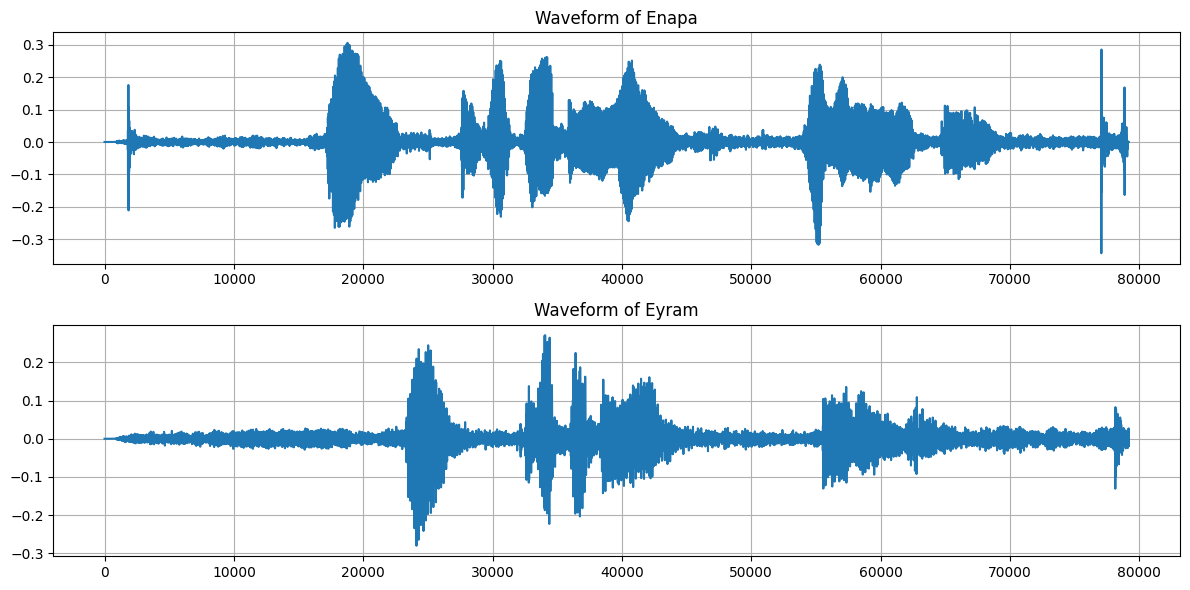

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Waveform of Enapa")
plt.plot(y_enapa)
plt.grid()
plt.subplot(2, 1, 2)    
plt.title("Waveform of Eyram")
plt.plot(y_eyram)
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
# Extraction of MFCCs with delta and delta-delta features
mfcc_enapa = librosa.feature.mfcc(y=y_enapa, sr=sr_enapa, n_mfcc=13)
mfcc_eyram = librosa.feature.mfcc(y=y_eyram, sr=sr_eyram, n_mfcc=13)
delta_mfcc_enapa = librosa.feature.delta(mfcc_enapa)
delta_mfcc_eyram = librosa.feature.delta(mfcc_eyram)
delta2_mfcc_enapa = librosa.feature.delta(mfcc_enapa, order=2)
delta2_mfcc_eyram = librosa.feature.delta(mfcc_eyram, order=2)
mfcc_features_enapa = np.vstack([mfcc_enapa, delta_mfcc_enapa, delta2_mfcc_enapa])
mfcc_features_eyram = np.vstack([mfcc_eyram, delta_mfcc_eyram, delta2_mfcc_eyram])
print(f"MFCC feature shape for Enapa: {mfcc_features_enapa.shape}")
print(f"MFCC feature shape for Eyram: {mfcc_features_eyram.shape}")

MFCC feature shape for Enapa: (39, 155)
MFCC feature shape for Eyram: (39, 155)


In [7]:
# Extraction of Chroma Features
chroma_enapa = librosa.feature.chroma_stft(y=y_enapa, sr=sr_enapa, n_chroma=12)
chroma_eyram = librosa.feature.chroma_stft(y=y_eyram, sr=sr_eyram, n_chroma=12)

# Compute the mean Chroma features across time for each audio
mean_chroma_enapa = np.mean(chroma_enapa, axis=1)
mean_chroma_eyram = np.mean(chroma_eyram, axis=1)

# Calculate the Euclidean distance between the mean Chroma features
distance_chroma = np.linalg.norm(mean_chroma_enapa - mean_chroma_eyram)
print(f"Euclidean distance between Enapa and Eyram Chroma features: {distance_chroma}")


Euclidean distance between Enapa and Eyram Chroma features: 0.8088938593864441


In [8]:
# Comparative Feature Analysis
def compare_features(feature1, feature2, feature_name):
    min_frames = min(feature1.shape[1], feature2.shape[1])
    feature1 = feature1[:, :min_frames]
    feature2 = feature2[:, :min_frames]
    distance = np.linalg.norm(feature1 - feature2)
    print(f"Euclidean distance between Enapa and Eyram {feature_name}: {distance}")
compare_features(mfcc_features_enapa, mfcc_features_eyram, "MFCC")
compare_features(chroma_enapa, chroma_eyram, "Chroma")

Euclidean distance between Enapa and Eyram MFCC: 1203.658447265625
Euclidean distance between Enapa and Eyram Chroma: 17.03233528137207


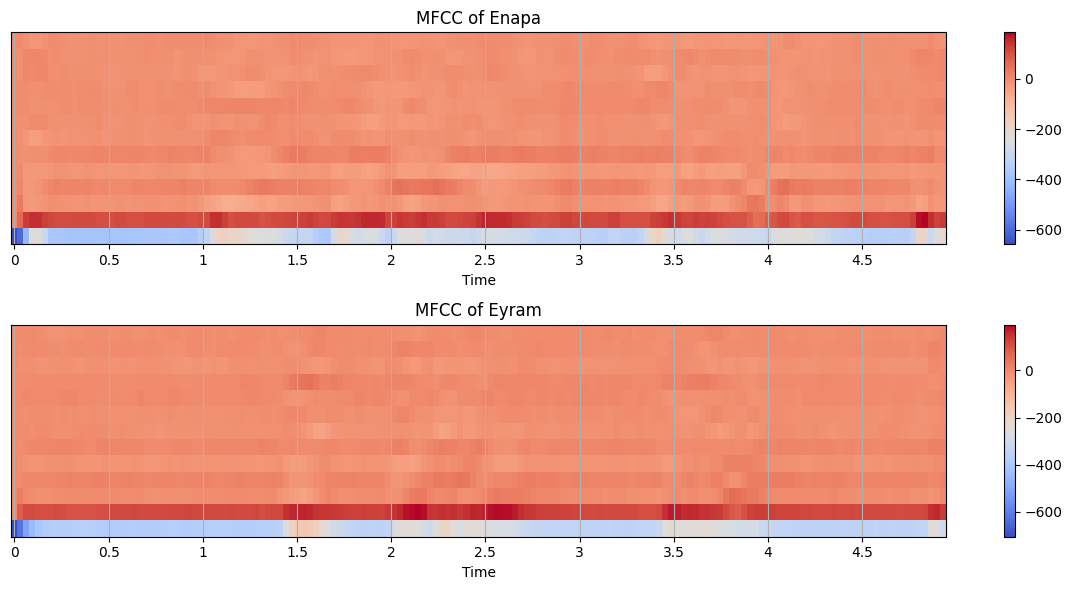

In [9]:
# Visualization of MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc_enapa, sr=sr_enapa, x_axis='time')
plt.colorbar()
plt.grid()
plt.title("MFCC of Enapa")
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc_eyram, sr=sr_eyram, x_axis='time')
plt.colorbar()
plt.grid()
plt.title("MFCC of Eyram")
plt.tight_layout()
plt.show()

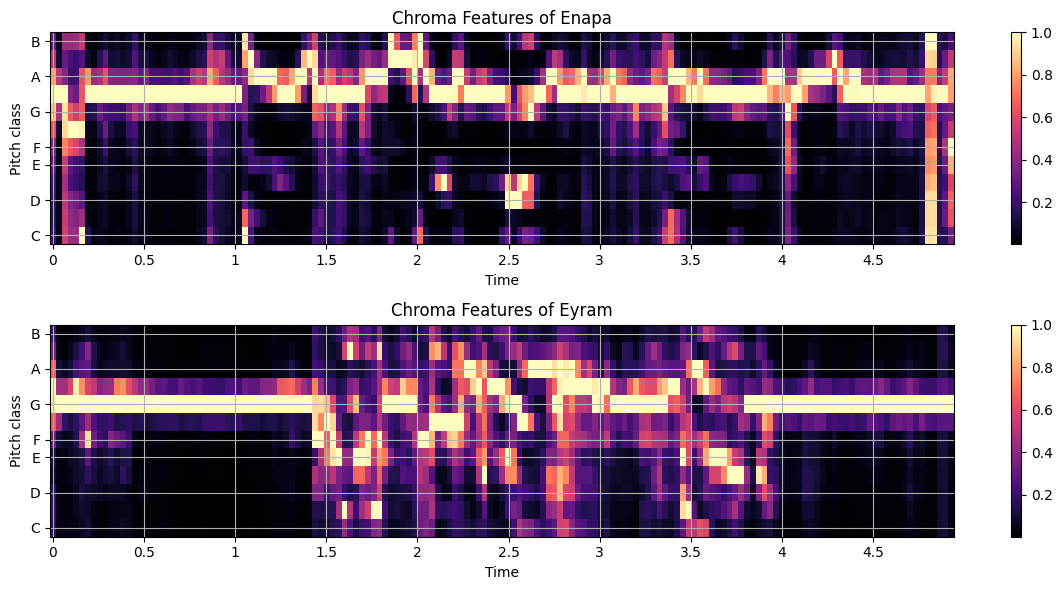

In [10]:
# Visualization of Chroma Features
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_enapa, sr=sr_enapa, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.grid()
plt.title("Chroma Features of Enapa")
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_eyram, sr=sr_eyram, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.grid()
plt.title("Chroma Features of Eyram")
plt.tight_layout()
plt.show()

In [11]:
# Statistical analysis of MFCCs
mean_mfcc_enapa = np.mean(mfcc_enapa, axis=1)
var_mfcc_enapa = np.var(mfcc_enapa, axis=1)
mean_mfcc_eyram = np.mean(mfcc_eyram, axis=1)
var_mfcc_eyram = np.var(mfcc_eyram, axis=1)

# Correlation between MFCCs of both speakers
corr_mfcc = [np.corrcoef(mfcc_enapa[i], mfcc_eyram[i])[0, 1] for i in range(mfcc_enapa.shape[0])]

# Identify MFCC coefficients with greatest discrimination (highest absolute mean difference)
mfcc_discrimination = np.abs(mean_mfcc_enapa - mean_mfcc_eyram)
top_mfcc_indices = np.argsort(mfcc_discrimination)[::-1][:5] 

print("Top 5 MFCC coefficients for speaker discrimination:", top_mfcc_indices)
print("MFCC mean differences:", mfcc_discrimination[top_mfcc_indices])

# Chroma feature differences
chroma_diff = np.abs(mean_chroma_enapa - mean_chroma_eyram)
top_chroma_indices = np.argsort(chroma_diff)[::-1][:3] 

print("Top 3 Chroma bins for speaker discrimination:", top_chroma_indices)
print("Chroma mean differences:", chroma_diff[top_chroma_indices])

Top 5 MFCC coefficients for speaker discrimination: [0 2 1 9 4]
MFCC mean differences: [28.76944  17.29642  11.963966  9.816863  9.287106]
Top 3 Chroma bins for speaker discrimination: [7 8 9]
Chroma mean differences: [0.5361886  0.38446265 0.34781927]


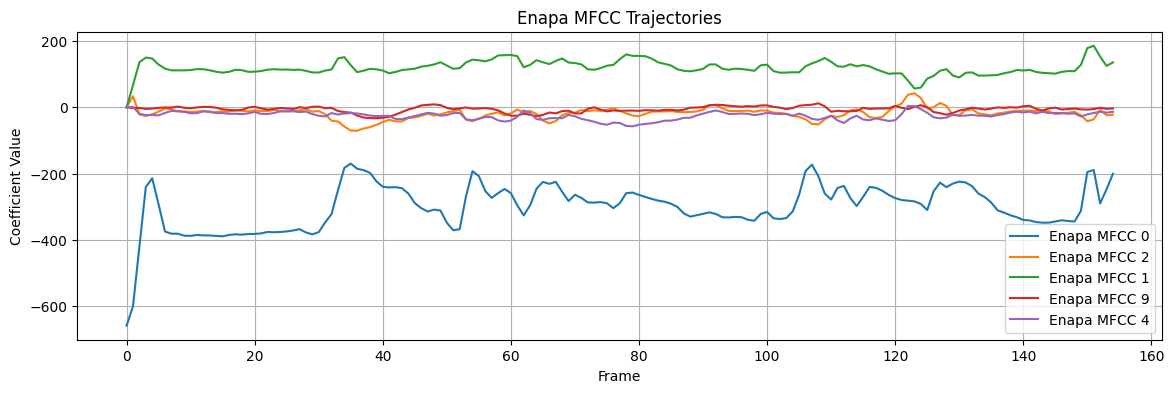

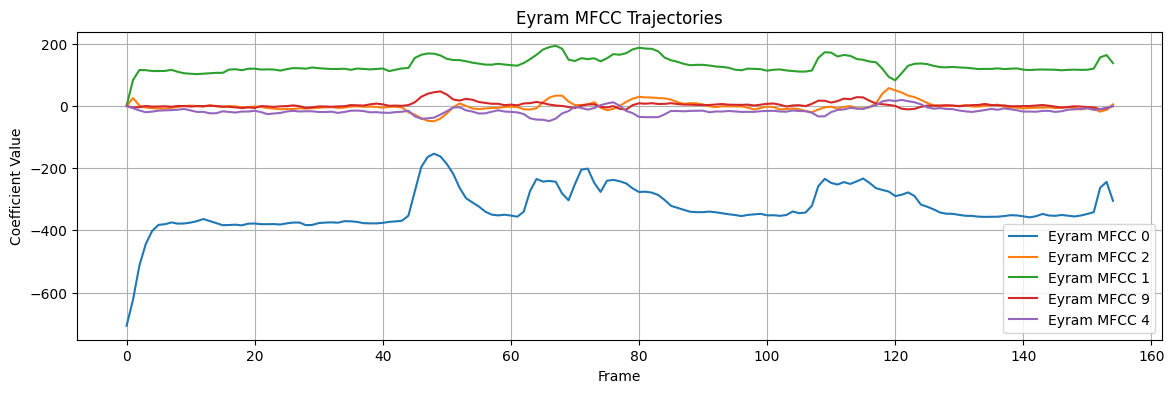

In [14]:
# Visualization of MFCC trajectories
plt.figure(figsize=(14, 4))
for idx in top_mfcc_indices:
    plt.plot(mfcc_enapa[idx], label=f'Enapa MFCC {idx}')
plt.title("Enapa MFCC Trajectories")
plt.xlabel("Frame")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 4))
for idx in top_mfcc_indices:
    plt.plot(mfcc_eyram[idx], label=f'Eyram MFCC {idx}')
plt.title("Eyram MFCC Trajectories")
plt.xlabel("Frame")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid()
plt.show()

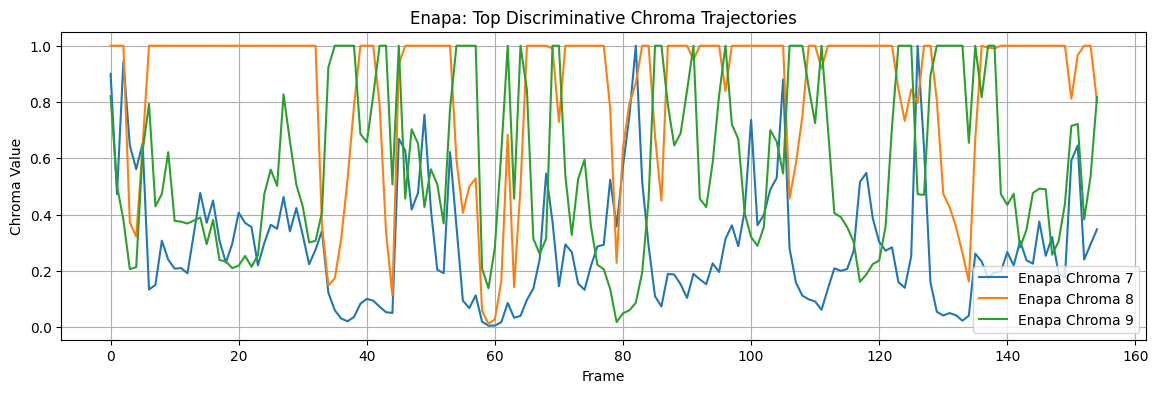

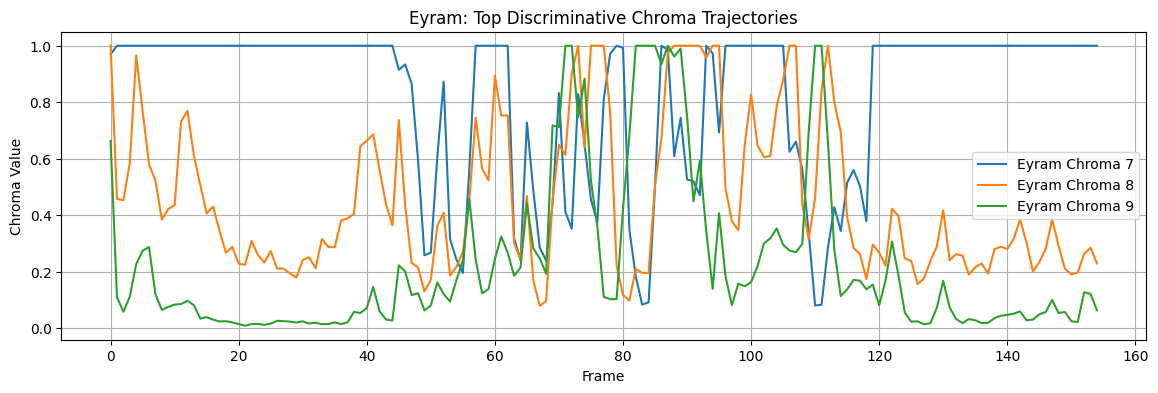

In [16]:
# Separate plots for Enapa
plt.figure(figsize=(14, 4))
for idx in top_chroma_indices:
    plt.plot(chroma_enapa[idx], label=f'Enapa Chroma {idx}')
plt.title("Enapa: Top Discriminative Chroma Trajectories")
plt.xlabel("Frame")
plt.ylabel("Chroma Value")
plt.legend()
plt.grid()
plt.show()

# Separate plots for Eyram
plt.figure(figsize=(14, 4))
for idx in top_chroma_indices:
    plt.plot(chroma_eyram[idx], label=f'Eyram Chroma {idx}')
plt.title("Eyram: Top Discriminative Chroma Trajectories")
plt.xlabel("Frame")
plt.ylabel("Chroma Value")
plt.legend()
plt.grid()
plt.show()